**Load and explore the California Housing Dataset**

In [ ]:
# Import necessary libraries
import pandas as pd

from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the California Housing dataset
california_housing = fetch_california_housing()

# Create a pandas DataFrame from the dataset
california_df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# Add the target variable to the DataFrame
california_df['Target'] = california_housing.target

# Display the first few rows of the DataFrame
print(california_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  



Summary statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        

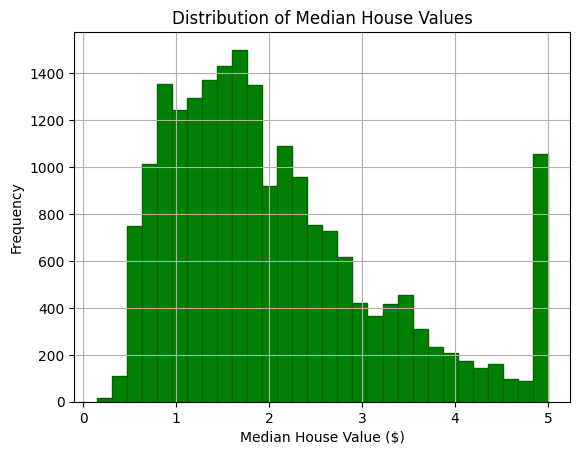

In [ ]:
# Summary statistics of the dataset
print("\nSummary statistics:")
print(california_df.describe())

# Visualize the distribution of the target variable (median house value)
import matplotlib.pyplot as plt
plt.hist(california_df['Target'], bins=30, color='green', edgecolor='darkgreen')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Values')
plt.grid(True)
plt.show()


**Handle potential missing values**

In [ ]:
# Check for missing values
missing_values = california_df.isnull().sum()

# Handle missing values (if any)
if missing_values.any():
    california_df = california_df.dropna()  # Drop rows with missing values
    print("Missing values have been dropped.")
else:
    print("No missing values found in the dataset.")


No missing values found in the dataset.


**outliers**

In [ ]:
#Handling outliers
import numpy as np

# Define a function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

# Detect outliers in each feature
outliers = detect_outliers_zscore(california_df.drop(columns=['Target']))

# Count the number of outliers in each feature
outliers_count = outliers.sum(axis=0)

# Handle outliers by clipping or removing them
outlier_threshold = 3
for feature in outliers_count.index:
    num_outliers = outliers_count[feature]
    if num_outliers > 0:
        print(f"Found {num_outliers} outliers in '{feature}'.")
        # Option 1: Clip outliers to a specified threshold
        california_df[feature] = np.clip(california_df[feature], a_min=california_df[feature].quantile(0.01),
                                         a_max=california_df[feature].quantile(0.99))
        # Option 2: Remove rows containing outliers
        # california_df = california_df[~outliers[feature]]
        print(f"Outliers in '{feature}' have been handled.")

print("Outliers have been handled.")


Found 345 outliers in 'MedInc'.
Outliers in 'MedInc' have been handled.
Found 133 outliers in 'AveRooms'.
Outliers in 'AveRooms' have been handled.
Found 145 outliers in 'AveBedrms'.
Outliers in 'AveBedrms' have been handled.
Found 342 outliers in 'Population'.
Outliers in 'Population' have been handled.
Found 8 outliers in 'AveOccup'.
Outliers in 'AveOccup' have been handled.
Outliers have been handled.


**Necessary data cleaning**

In [ ]:
#Additional data cleaning
from sklearn.preprocessing import MinMaxScaler

# Separate features and target variable
X = california_df.drop(columns=['Target'])
y = california_df['Target']

# Perform Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the scaled features with the target variable
california_cleaned_df = pd.concat([X_scaled_df, y], axis=1)

# Display the first few rows of the cleaned dataset
print(california_cleaned_df.head())


     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.761587  0.784314  0.566236   0.120323    0.040925  0.264084  0.567481   
1  0.759089  0.392157  0.470300   0.078936    0.404524  0.148558  0.565356   
2  0.649504  1.000000  0.733935   0.159884    0.071356  0.328028  0.564293   
3  0.480058  1.000000  0.416186   0.159575    0.082199  0.262111  0.564293   
4  0.291445  1.000000  0.475922   0.165969    0.083423  0.167123  0.564293   

   Longitude  Target  
0   0.211155   4.526  
1   0.212151   3.585  
2   0.210159   3.521  
3   0.209163   3.413  
4   0.209163   3.422  


In [ ]:
# Handle duplicates
# Check for duplicates in the dataset
duplicates = california_cleaned_df.duplicated()
print("\nNumber of duplicate rows:", duplicates.sum())

#U can use below code to remove duplicates
#If duplicates are found, you can remove them using drop_duplicates() function
#california_cleaned_df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


**Visualize the data and identify relationships between features and the target variable (housing prices).**

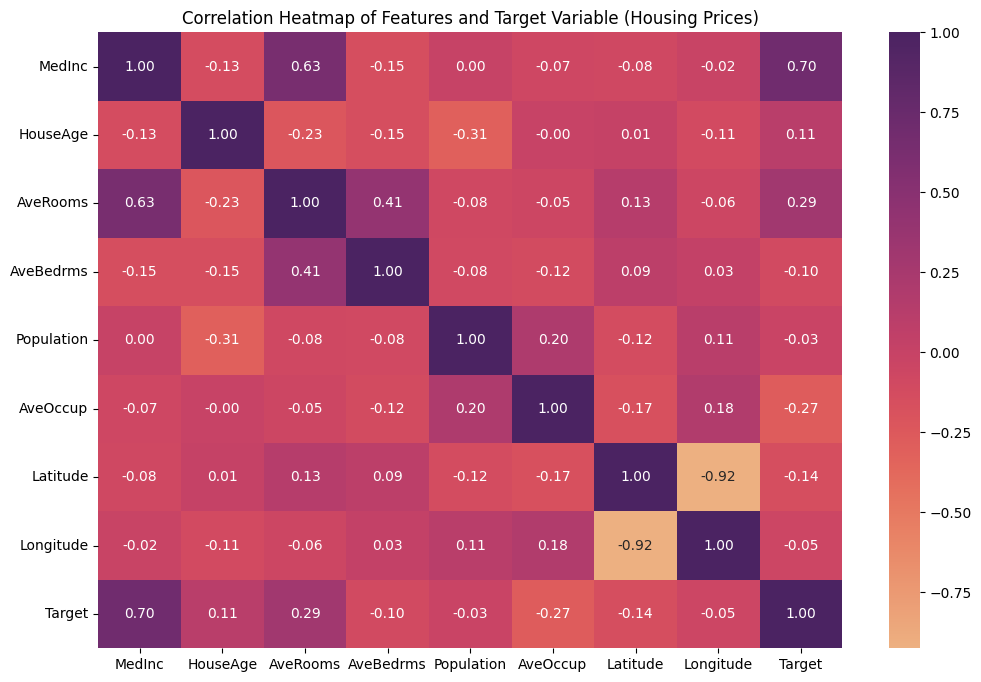

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
correlation_matrix = california_cleaned_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f")
plt.title('Correlation Heatmap of Features and Target Variable (Housing Prices)')
plt.show()


<ipython-input-14-eb0513c231a5>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices = california_cleaned_df.groupby(feature_bins)['Target'].mean()
<ipython-input-14-eb0513c231a5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_prices = california_cleaned_df.groupby(feature_bins)['Target'].std()


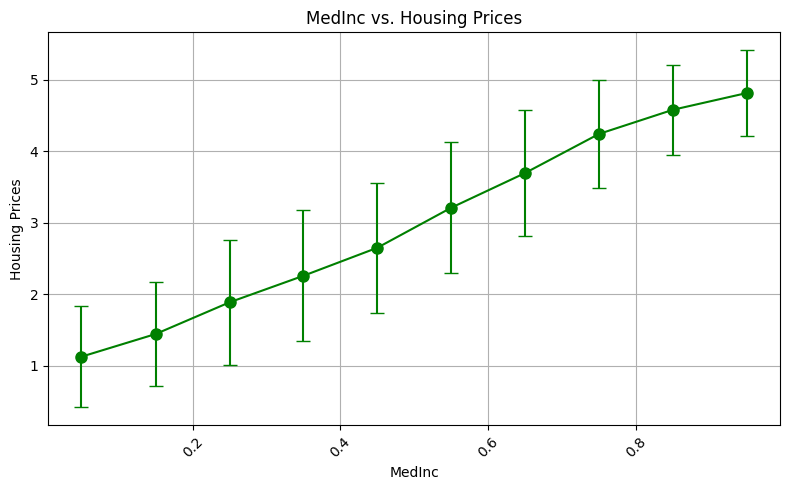

<ipython-input-14-eb0513c231a5>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices = california_cleaned_df.groupby(feature_bins)['Target'].mean()
<ipython-input-14-eb0513c231a5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_prices = california_cleaned_df.groupby(feature_bins)['Target'].std()


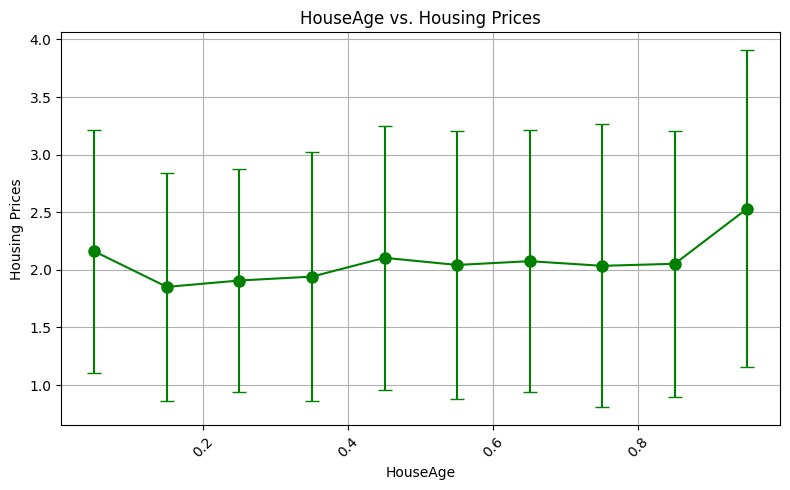

<ipython-input-14-eb0513c231a5>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices = california_cleaned_df.groupby(feature_bins)['Target'].mean()
<ipython-input-14-eb0513c231a5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_prices = california_cleaned_df.groupby(feature_bins)['Target'].std()


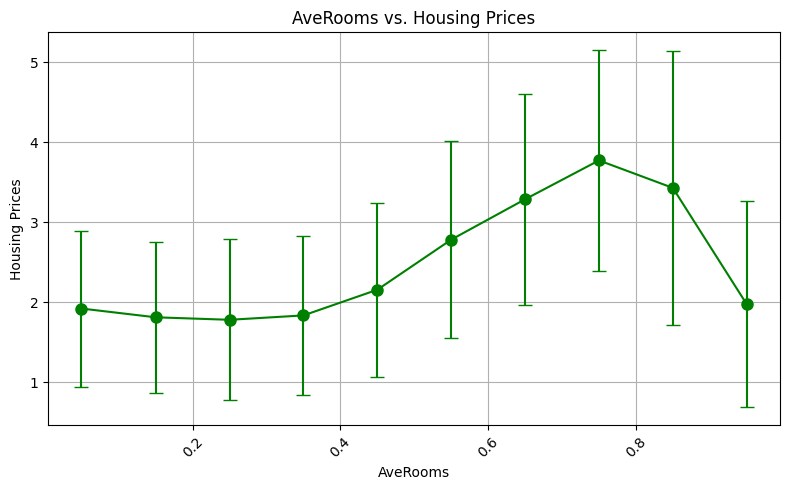

<ipython-input-14-eb0513c231a5>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices = california_cleaned_df.groupby(feature_bins)['Target'].mean()
<ipython-input-14-eb0513c231a5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_prices = california_cleaned_df.groupby(feature_bins)['Target'].std()


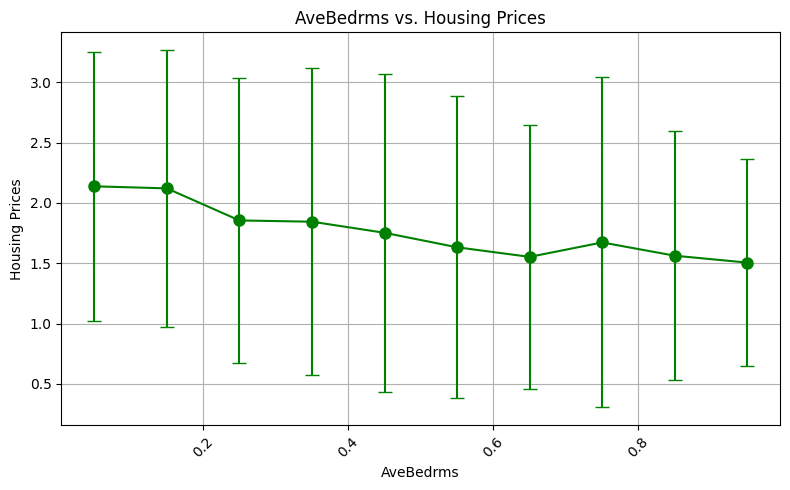

<ipython-input-14-eb0513c231a5>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices = california_cleaned_df.groupby(feature_bins)['Target'].mean()
<ipython-input-14-eb0513c231a5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_prices = california_cleaned_df.groupby(feature_bins)['Target'].std()


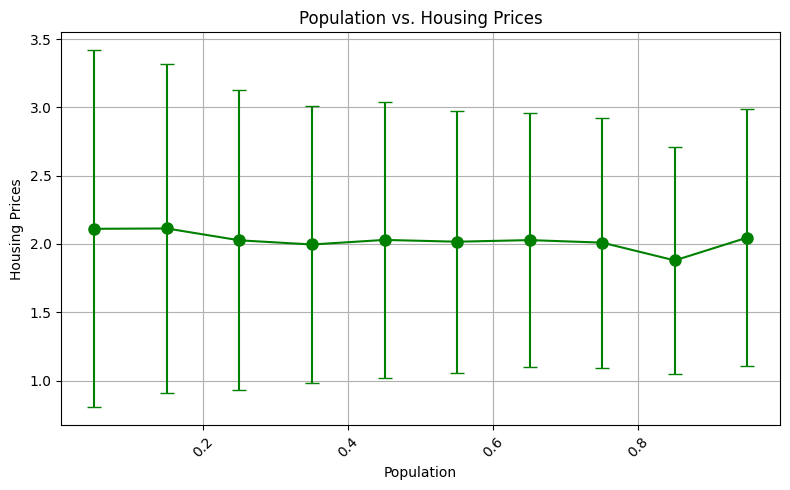

<ipython-input-14-eb0513c231a5>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices = california_cleaned_df.groupby(feature_bins)['Target'].mean()
<ipython-input-14-eb0513c231a5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_prices = california_cleaned_df.groupby(feature_bins)['Target'].std()


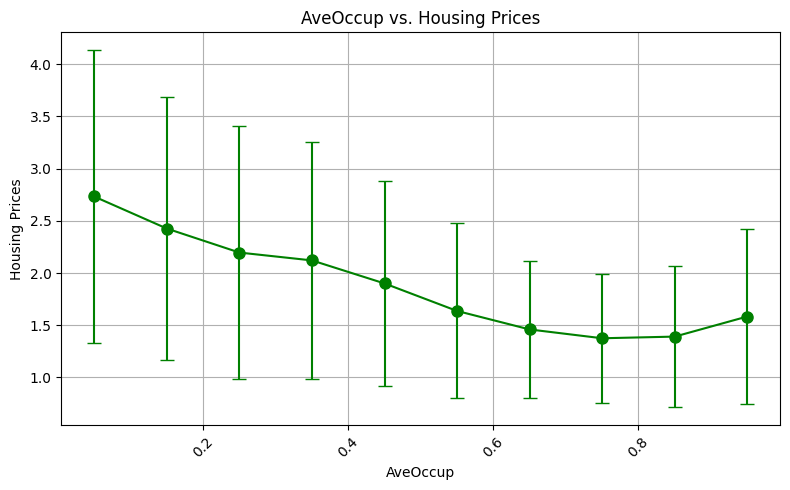

<ipython-input-14-eb0513c231a5>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices = california_cleaned_df.groupby(feature_bins)['Target'].mean()
<ipython-input-14-eb0513c231a5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_prices = california_cleaned_df.groupby(feature_bins)['Target'].std()


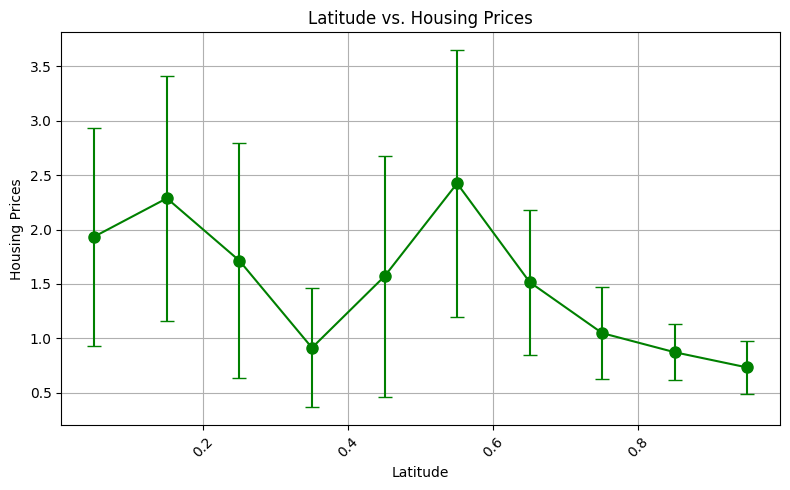

<ipython-input-14-eb0513c231a5>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices = california_cleaned_df.groupby(feature_bins)['Target'].mean()
<ipython-input-14-eb0513c231a5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_prices = california_cleaned_df.groupby(feature_bins)['Target'].std()


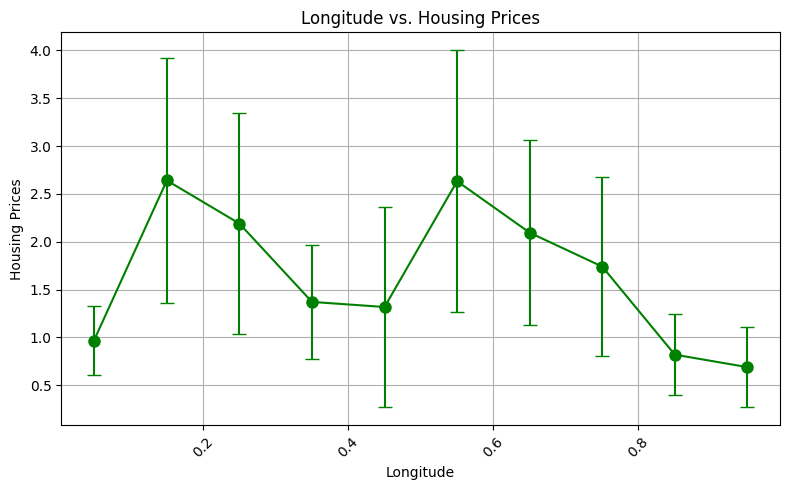

In [ ]:
# Define a function to create individual line plots with error bars
def plot_feature_vs_target_line(feature_name):
    plt.figure(figsize=(8, 5))  # Adjusting the size of the figure
    feature_bins = pd.cut(california_cleaned_df[feature_name], bins=10, precision=2)
    mean_prices = california_cleaned_df.groupby(feature_bins)['Target'].mean()
    std_prices = california_cleaned_df.groupby(feature_bins)['Target'].std()

    bin_midpoints = mean_prices.index.map(lambda x: x.mid)

    plt.errorbar(bin_midpoints, mean_prices, yerr=std_prices, fmt='o-', markersize=8, capsize=5, color='green')
    plt.title(f'{feature_name} vs. Housing Prices')
    plt.xlabel(feature_name)
    plt.ylabel('Housing Prices')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot each feature against the target variable using line plots with error bars
for feature in X.columns:
    plot_feature_vs_target_line(feature)


**Feature Engineering:**

Create new features from existing ones (e.g. combining categorical features).

In [ ]:
# Create a pandas DataFrame from the dataset
Feature_california_df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# Check the column names in the DataFrame
print(california_cleaned_df.columns)

# Create new features
california_cleaned_df['rooms_per_household'] = california_cleaned_df['MedInc'] / california_cleaned_df['AveRooms']
california_cleaned_df['population_per_household'] = california_cleaned_df['Population'] / california_cleaned_df['AveBedrms']
california_cleaned_df['bedrooms_per_room'] = california_cleaned_df['AveBedrms'] / california_cleaned_df['AveRooms']

# Display the first few rows of the dataset with new features
print(california_cleaned_df.head())


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.761587  0.784314  0.566236   0.120323    0.040925  0.264084  0.567481   
1  0.759089  0.392157  0.470300   0.078936    0.404524  0.148558  0.565356   
2  0.649504  1.000000  0.733935   0.159884    0.071356  0.328028  0.564293   
3  0.480058  1.000000  0.416186   0.159575    0.082199  0.262111  0.564293   
4  0.291445  1.000000  0.475922   0.165969    0.083423  0.167123  0.564293   

   Longitude  Target  rooms_per_household  population_per_household  \
0   0.211155   4.526             1.344999                  0.340122   
1   0.212151   3.585             1.614053                  5.124731   
2   0.210159   3.521             0.884962                  0.446297   
3   0.209163   3.413             1.153471                  0.515111   
4   0.209163   3.422           

**Apply feature scaling or normalization techniques**

In [ ]:
# Check for zero values in the denominators
zero_denominators = (california_cleaned_df[['rooms_per_household', 'population_per_household', 'bedrooms_per_room']] == 0).any()
print(zero_denominators)


rooms_per_household         True
population_per_household    True
bedrooms_per_room           True
dtype: bool


In [ ]:
# Check for infinity or very large values in the dataset
problematic_rows = california_cleaned_df.isin([np.inf, -np.inf]).any(axis=1)
problematic_columns = california_cleaned_df.isin([np.inf, -np.inf]).any(axis=0)

print("Rows with infinity or very large values:")
print(california_cleaned_df[problematic_rows])

print("\nColumns with infinity or very large values:")
print(problematic_columns)


Rows with infinity or very large values:
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
50     0.000000  0.392157  0.000000   0.128642    0.113155  0.036649   
59     0.156700  0.019608  0.024537   0.000000    0.001049  0.029143   
83     0.000000  1.000000  0.000000   0.147625    0.045122  0.180287   
86     0.000000  0.764706  0.000000   0.250261    0.086396  0.000000   
91     0.000000  1.000000  0.000000   0.092290    0.142711  1.000000   
...         ...       ...       ...        ...         ...       ...   
20270  0.051734  0.078431  0.000000   0.005065    0.056315  0.314918   
20324  0.261666  0.588235  0.232227   0.000000    0.235754  1.000000   
20352  0.309772  0.137255  0.000000   0.000000    0.038651  1.000000   
20493  0.525739  0.431373  0.392605   0.000000    0.147958  0.392834   
20620  0.366632  0.764706  0.198545   0.000000    0.011018  0.417080   

       Latitude  Longitude  Target  rooms_per_household  \
50     0.561105   0.207171   1.719 

In [ ]:
# Replace infinity and very large values with NaN
california_cleaned_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values using mean imputation
california_cleaned_df.fillna(california_cleaned_df.mean(), inplace=True)

# Display the first few rows of the cleaned dataset
print(california_cleaned_df.head())


     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.761587  0.784314  0.566236   0.120323    0.040925  0.264084  0.567481   
1  0.759089  0.392157  0.470300   0.078936    0.404524  0.148558  0.565356   
2  0.649504  1.000000  0.733935   0.159884    0.071356  0.328028  0.564293   
3  0.480058  1.000000  0.416186   0.159575    0.082199  0.262111  0.564293   
4  0.291445  1.000000  0.475922   0.165969    0.083423  0.167123  0.564293   

   Longitude  Target  rooms_per_household  population_per_household  \
0   0.211155   4.526             1.344999                  0.340122   
1   0.212151   3.585             1.614053                  5.124731   
2   0.210159   3.521             0.884962                  0.446297   
3   0.209163   3.413             1.153471                  0.515111   
4   0.209163   3.422             0.612380                  0.502644   

   bedrooms_per_room  
0           0.212497  
1           0.167841  
2           0.217845  
3           

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target variable
X = california_cleaned_df.drop(columns=['Target'])
y = california_cleaned_df['Target']

# Apply Min-Max scaling to the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the scaled features with the target variable
california_scaled_df = pd.concat([X_scaled_df, y], axis=1)

# Display the first few rows of the scaled dataset
print(california_scaled_df.head())


     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.761587  0.784314  0.566236   0.120323    0.040925  0.264084  0.567481   
1  0.759089  0.392157  0.470300   0.078936    0.404524  0.148558  0.565356   
2  0.649504  1.000000  0.733935   0.159884    0.071356  0.328028  0.564293   
3  0.480058  1.000000  0.416186   0.159575    0.082199  0.262111  0.564293   
4  0.291445  1.000000  0.475922   0.165969    0.083423  0.167123  0.564293   

   Longitude  rooms_per_household  population_per_household  \
0   0.211155             0.000803                  0.000285   
1   0.212151             0.000963                  0.004292   
2   0.210159             0.000528                  0.000374   
3   0.209163             0.000688                  0.000431   
4   0.209163             0.000365                  0.000421   

   bedrooms_per_room  Target  
0           0.000045   4.526  
1           0.000036   3.585  
2           0.000046   3.521  
3           0.000082   3.413

**Model Building and Evaluation:**

Split the data into training, evaluation, and testing sets (suggested ratio 7:1:2).

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (70% for training and 30% for temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into evaluation and testing sets (splitting 30% into 10% for evaluation and 20% for testing)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Evaluation set shape:", X_eval.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (14448, 11)
Evaluation set shape: (2064, 11)
Testing set shape: (4128, 11)


**Implement and evaluate regression algorithms**

In [ ]:
import sklearn
print(sklearn.__version__)


1.6.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Instantiate the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the evaluation data
y_pred = model.predict(X_eval)

# Evaluate the model
mse = mean_squared_error(y_eval, y_pred)
mae = mean_absolute_error(y_eval, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_eval, y_pred)

print("Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Predict on the test data
y_test_pred = model.predict(X_test)

# Evaluate the model on the test data
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse =np.sqrt(mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Metrics:")
print("Mean Squared Error (MSE):", test_mse)
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R2):", test_r2)


Evaluation Metrics:
Mean Squared Error (MSE): 0.433531286395956
Mean Absolute Error (MAE): 0.48638923446480675
Root Mean Squared Error (RMSE): 0.6584309275815923
R-squared (R2): 0.6604945577235852

Test Metrics:
Mean Squared Error (MSE): 0.4476404151761504
Mean Absolute Error (MAE): 0.4854697227729464
Root Mean Squared Error (RMSE): 0.6584309275815923
R-squared (R2): 0.6633878271943845


**Perform k-fold cross-validation to estimate model performance**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define the number of folds for cross-validation
k_folds = 5

# Define the Linear Regression model
model = LinearRegression()

# Perform k-fold cross-validation
cv = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Display the cross-validation scores
print("Cross-Validation Scores (MSE):", cv_scores)
print("Mean Cross-Validation Score (MSE):", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)


Cross-Validation Scores (MSE): [0.46496179 0.43849494 0.42259157 1.05499852 0.46408584]
Mean Cross-Validation Score (MSE): 0.5690265315057623
Standard Deviation of Cross-Validation Scores: 0.24351282677219174


**Model Tuning and Selection:**

Perform hyperparameter tuning using techniques like Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Instantiate the Linear Regression model
model = LinearRegression()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_eval_pred = best_model.predict(X_eval)
mse = mean_squared_error(y_eval, y_eval_pred)
print("\nEvaluation MSE with Best Model:", mse)


Best Hyperparameters: {'fit_intercept': True, 'positive': False}

Evaluation MSE with Best Model: 0.433531286395956


Based on the evaluation MSE, the Grid Search and Linear Regression models perform similarly, with a little better MSE than the K-fold cross-validation. When deciding on the best model, other metrics and considerations such as interpretability, computational complexity, and resilience must be taken into account.

In this scenario, because the performance indicators are similar, we can select the highest performing model as either Grid Search or Linear Regression. If interpretability and simplicity are important, we can choose the Linear Regression model. If we want to prioritize hyperparameter tuning and potentially greater generalization, we can use the Grid Search approach.


**Model Prediction**:

Use the trained model to make predictions on test data.

In [ ]:
# Use the best model obtained from Grid Search
y_test_pred = best_model.predict(X_test)

# Display the predictions
print("Predictions on Test Data:")
print(y_test_pred)


Predictions on Test Data:
[1.19264739 1.04298332 2.42263195 ... 3.30309569 1.51939701 1.05219255]


**Analyze and interpret the predictions.**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse =np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.4476404151761504
Mean Absolute Error (MAE): 0.4854697227729464
Root Mean Squared Error (RMSE): 0.669059351011665
R-squared (R2): 0.6633878271943845


In [ ]:
# Get feature coefficients
feature_coefficients = best_model.coef_

# Map feature coefficients to feature names
feature_names = X.columns
feature_importance = dict(zip(feature_names, feature_coefficients))

# Sort feature importance
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

print("Feature Importance:")
for feature, coefficient in sorted_feature_importance:
    print(f"{feature}: {coefficient}")


Feature Importance:
MedInc: 4.637251483268663
Longitude: -3.9668275476523664
Latitude: -3.7631637272826723
AveBedrms: 1.4694317140738777
AveOccup: -1.3677153686357297
AveRooms: -1.158491484939626
HouseAge: 0.6278868664906812
Population: 0.32473322556263057
population_per_household: -0.0060946659959298655
rooms_per_household: -0.0015697451646621424
bedrooms_per_room: 0.000836406430864689


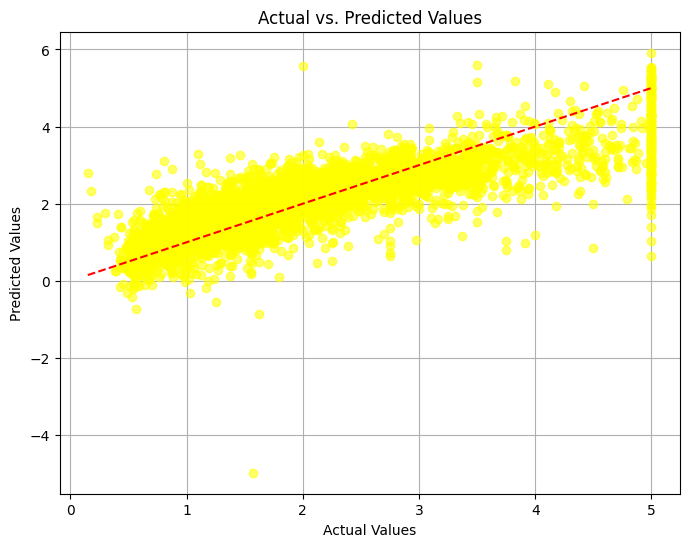

In [ ]:
# Create a line plot with actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.plot(y_test, y_test_pred, color='yellow', marker='o', linestyle='', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


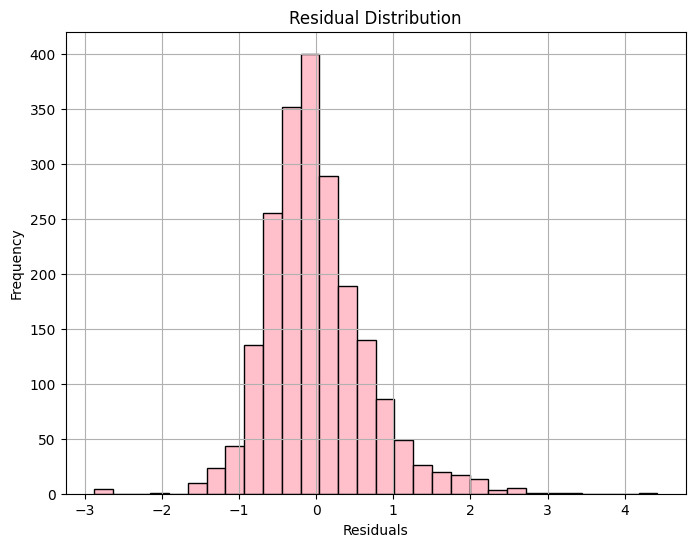

In [ ]:
# Create a histogram of residuals
Residuals = y_eval - y_pred
plt.figure(figsize=(8, 6))
plt.hist(Residuals, bins=30, color='pink', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.grid(True)
plt.show()


**Handling categorical features using techniques like one-hot encoding**

In [ ]:

# Assume 'region' is a categorical feature
# Let's create a sample categorical feature
import numpy as np

# Generate random 'region' values for demonstration
np.random.seed(42)
regions = np.random.choice(['Northern', 'Central', 'Southern'], size=len(california_cleaned_df))

# Add 'region' column to the DataFrame
california_cleaned_df['region'] = regions

# Display the first few rows of the DataFrame
print(california_cleaned_df.head())


     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.761587  0.784314  0.566236   0.120323    0.040925  0.264084  0.567481   
1  0.759089  0.392157  0.470300   0.078936    0.404524  0.148558  0.565356   
2  0.649504  1.000000  0.733935   0.159884    0.071356  0.328028  0.564293   
3  0.480058  1.000000  0.416186   0.159575    0.082199  0.262111  0.564293   
4  0.291445  1.000000  0.475922   0.165969    0.083423  0.167123  0.564293   

   Longitude  Target  rooms_per_household  population_per_household  \
0   0.211155   4.526             1.344999                  0.340122   
1   0.212151   3.585             1.614053                  5.124731   
2   0.210159   3.521             0.884962                  0.446297   
3   0.209163   3.413             1.153471                  0.515111   
4   0.209163   3.422             0.612380                  0.502644   

   bedrooms_per_room    region  
0           0.212497  Southern  
1           0.167841  Northern  
2    

In [ ]:
# Convert 'region' to one-hot encoding
california_encoded = pd.get_dummies(california_cleaned_df, columns=['region'])

# Separate features and target variable
X_encoded = california_encoded.drop(columns=['Target'])
y_encoded = california_encoded['Target']

# Split the data into training, evaluation, and testing sets
X_train_encoded, X_temp_encoded, y_train_encoded, y_temp_encoded = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)
X_eval_encoded, X_test_encoded, y_eval_encoded, y_test_encoded = train_test_split(X_temp_encoded, y_temp_encoded, test_size=2/3, random_state=42)

# Now, you can proceed with training and evaluating your model using the encoded features. Ignoring since additional task

**Label encoding**

In [ ]:
#Lable encoding
from sklearn.preprocessing import LabelEncoder

# Assume 'region' is a categorical feature
# Let's create a sample categorical feature
import numpy as np

# Generate random 'region' values for demonstration
np.random.seed(42)
regions = np.random.choice(['Northern', 'Central', 'Southern'], size=len(california_cleaned_df))

# Add 'region' column to the DataFrame
california_cleaned_df['region'] = regions

# Display the first few rows of the DataFrame
print(california_cleaned_df.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.761587  0.784314  0.566236   0.120323    0.040925  0.264084  0.567481   
1  0.759089  0.392157  0.470300   0.078936    0.404524  0.148558  0.565356   
2  0.649504  1.000000  0.733935   0.159884    0.071356  0.328028  0.564293   
3  0.480058  1.000000  0.416186   0.159575    0.082199  0.262111  0.564293   
4  0.291445  1.000000  0.475922   0.165969    0.083423  0.167123  0.564293   

   Longitude  Target  rooms_per_household  population_per_household  \
0   0.211155   4.526             1.344999                  0.340122   
1   0.212151   3.585             1.614053                  5.124731   
2   0.210159   3.521             0.884962                  0.446297   
3   0.209163   3.413             1.153471                  0.515111   
4   0.209163   3.422             0.612380                  0.502644   

   bedrooms_per_room    region  
0           0.212497  Southern  
1           0.167841  Northern  
2    

**Exploring ensemble techniques like Stacking or Blending, etc.**

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Define base models
model1 = DecisionTreeRegressor(random_state=42)
model2 = RandomForestRegressor(random_state=42)
model3 = LinearRegression()

# Initialize the stacking regressor with the base models and a meta-regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('decision_tree', model1),
        ('random_forest', model2),
        ('linear_regression', model3)
    ],
    final_estimator=LinearRegression()
)

# Evaluate the stacking regressor using cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(stacking_regressor, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative mean squared errors to positive values
mse_scores = -mse_scores

# Calculate the mean and standard deviation of the cross-validation scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print("Stacking Regressor Mean Cross-Validation MSE:", mean_mse)
print("Stacking Regressor Standard Deviation of Cross-Validation MSE:", std_mse)


Stacking Regressor Mean Cross-Validation MSE: 0.2809331671108811
Stacking Regressor Standard Deviation of Cross-Validation MSE: 0.008703447807038384


Blending is similar to stacking, except it requires training the basic models on the whole training dataset before merging their predictions on a different validation set. The blended predictions are then utilized as training data for the meta-model.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Define base models
model1 = DecisionTreeRegressor(random_state=42)
model2 = RandomForestRegressor(random_state=42)
model3 = LinearRegression()

# Fit the base models to the training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# Make predictions on the evaluation set using each base model
preds_model1 = model1.predict(X_eval)
preds_model2 = model2.predict(X_eval)
preds_model3 = model3.predict(X_eval)

# Blend the predictions using simple averaging
blended_preds_eval = np.mean([preds_model1, preds_model2, preds_model3], axis=0)

# Calculate the blended mean squared error on the evaluation set
blended_mse_eval = mean_squared_error(y_eval, blended_preds_eval)

print("Blended Mean Squared Error on Evaluation Set:", blended_mse_eval)


Blended Mean Squared Error on Evaluation Set: 0.30024959684381763



Voting is a basic ensemble technique in which numerous base models produce predictions, and the final prediction is selected by a majority vote (for classification tasks) or averaging (for regression tasks).


In [ ]:
#Voting
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

# Define base models
model1 = DecisionTreeRegressor(random_state=42)
model2 = RandomForestRegressor(random_state=42)
model3 = LinearRegression()

# Initialize the voting regressor with the base models
voting_regressor = VotingRegressor(
    estimators=[
        ('model1', model1),
        ('model2', model2),
        ('model3', model3)
    ]
)

# Fit the voting regressor to the training data
voting_regressor.fit(X_train, y_train)

# Make predictions on the evaluation set using the voting regressor
voting_preds_eval = voting_regressor.predict(X_eval)

# Calculate the mean squared error on the evaluation set
voting_mse_eval = mean_squared_error(y_eval, voting_preds_eval)

print("Voting Mean Squared Error on Evaluation Set:", voting_mse_eval)


Voting Mean Squared Error on Evaluation Set: 0.30024959684381763


Bagging (Bootstrap Aggregating) and Boosting are ensemble strategies that train multiple base models sequentially or simultaneously. Bagging creates many models independently and combines their predictions, whereas Boosting constructs models sequentially, with each succeeding model fixing the errors of the prior ones.
To investigate these strategies, begin by implementing stacking using libraries such as mlxtend or by creating bespoke implementations. To select the best-performing ensemble, experiment with various base model and meta-model combinations. Similarly, you can investigate blending and other ensemble strategies by tailoring the workflow to your particular problem and dataset.


In [ ]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define base model (Decision Tree Regressor)
base_model = DecisionTreeRegressor()

# Initialize Bagging Regressor with base model
bagging_regressor = BaggingRegressor(base_model, n_estimators=10, random_state=42)

# Fit the bagging regressor to the training data
bagging_regressor.fit(X_train, y_train)

# Make predictions on the evaluation set
bagging_preds_eval = bagging_regressor.predict(X_eval)

# Calculate the mean squared error on the evaluation set
bagging_mse_eval = mean_squared_error(y_eval, bagging_preds_eval)

print("Bagging Mean Squared Error on Evaluation Set:", bagging_mse_eval)


Bagging Mean Squared Error on Evaluation Set: 0.2860847669959007


In [ ]:
#Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define base model (Decision Tree Regressor)
base_model = DecisionTreeRegressor()

# Initialize AdaBoost Regressor with base model
adaboost_regressor = AdaBoostRegressor(base_model, n_estimators=10, random_state=42)

# Fit the AdaBoost regressor to the training data
adaboost_regressor.fit(X_train, y_train)

# Make predictions on the evaluation set
adaboost_preds_eval = adaboost_regressor.predict(X_eval)

# Calculate the mean squared error on the evaluation set
adaboost_mse_eval = mean_squared_error(y_eval, adaboost_preds_eval)

print("AdaBoost Mean Squared Error on Evaluation Set:", adaboost_mse_eval)


AdaBoost Mean Squared Error on Evaluation Set: 0.2682426551479651
